In [1]:
import mne 
import torch 
import torch.nn as nn

In [2]:

raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/New Dataset/Raw Data (1)/Subject_Set-1/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.set', preload= True)

Reading /home/technoshr370/Downloads/Dataset/New Dataset/Raw Data (1)/Subject_Set-1/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.fdt
Reading 0 ... 430526  =      0.000 ...  1722.104 secs...


/tmp/ipykernel_92154/4151484728.py:1: RuntimeWarning: Unknown types found, setting as type EEG:
pns: ['ECG', 'EMG', 'EMG_2']
  raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/New Dataset/Raw Data (1)/Subject_Set-1/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.set', preload= True)
/tmp/ipykernel_92154/4151484728.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/New Dataset/Raw Data (1)/Subject_Set-1/sub-mit004/eeg/sub-mit004_task-Emotion_eeg.set', preload= True)


In [3]:
raw.filter(1, 40, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


<RawEEGLAB | sub-mit004_task-Emotion_eeg.fdt, 132 x 430527 (1722.1 s), ~433.7 MB, data loaded>

In [4]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 132 EEG
 custom_ref_applied: False
 dig: 135 items (3 Cardinal, 132 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: unspecified
 nchan: 132
 projs: []
 sfreq: 250.0 Hz
>


In [25]:
raw_eeg = raw.copy().pick_types(eeg=True, eog=False, ecg=False, emg=False, exclude=['ECG', 'EMG', 'EMG_2'])

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


In [26]:
# Verify the channels in raw_eeg to ensure no non-EEG channels are present
print(raw_eeg.info['ch_names'])

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129']


In [27]:
ica = mne.preprocessing.ICA(n_components=15, random_state=97)
ica.fit(raw_eeg)

Fitting ICA to data using 129 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 24.3s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,76 iterations on raw data (430527 samples)
ICA components,15
Available PCA components,129
Channel types,eeg
ICA components marked for exclusion,—


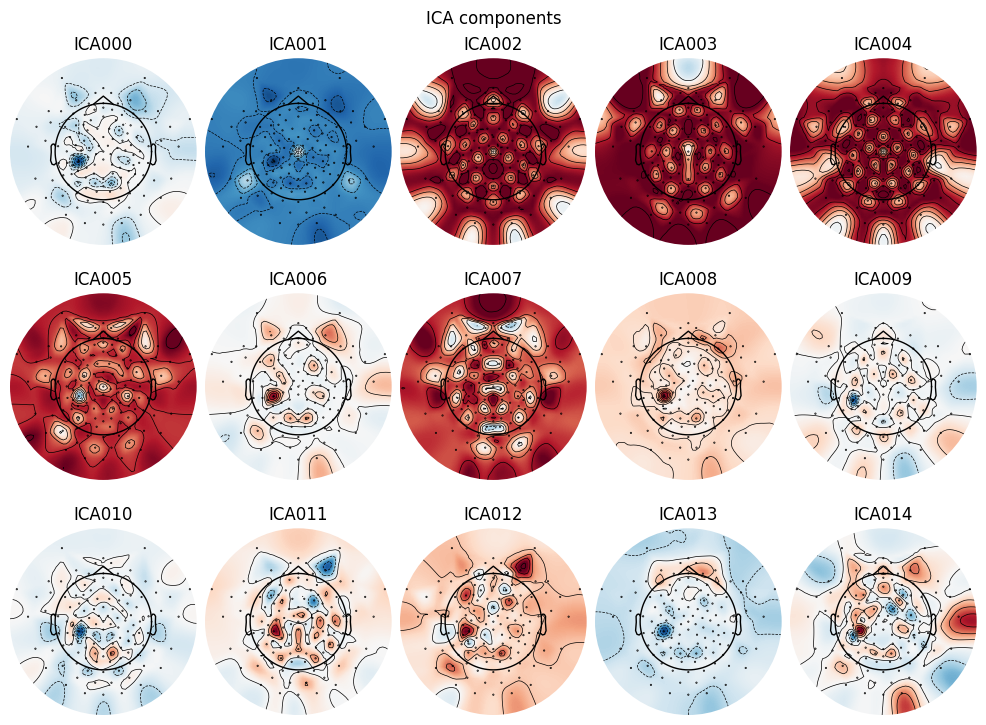

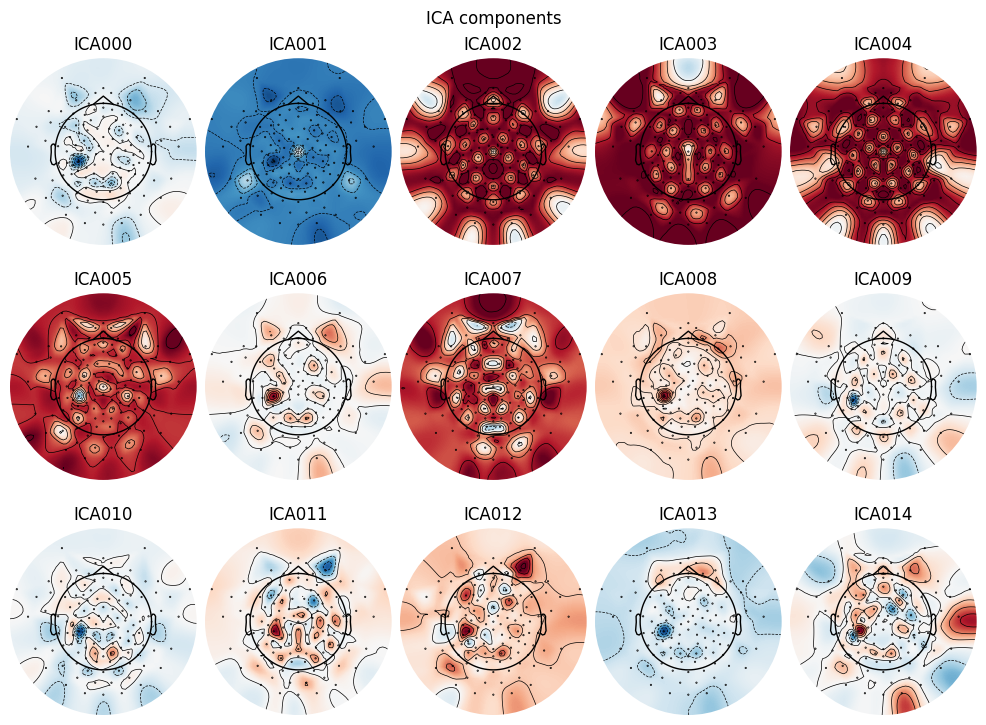

In [28]:
ica.plot_components(inst=raw_eeg)

In [21]:
import pandas as pd 

In [23]:
pd.read_csv('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit004/eeg/sub-mit004_task-emotion_events.tsv')

,onset\tduration\ttrial_type\tlabel\tdescription
0,9409.874026\t1000.0\tquiz\tquiz\tPerforming Qu...
1,32862.874959\t1000.0\tqdon\tQDone\tQuiz is don...
2,38798.124902\t1000.0\tbase\tbaseline\tn/a
3,58795.874007\t1000.0\tbend\tbaseEnd\tBaseline ...
4,59647.624567\t1000.0\ttrno\tTrialNo\tShowing T...
...,...
126,412923.473941\t1000.0\tlkng\tLiking\tShowing t...
127,414327.474573\t1000.0\tfmrt\tFamiliarity\tShow...
128,415100.722743\t1000.0\trelv\tRelevance\tShowin...
129,415857.22387\t1000.0\tcate\tEmotion_Categ\tSho...


# Need to compare tsv and csv for beh data 

In [1]:
import pandas as pd 
import numpy as np 

In [4]:
raw_tsv_task_emotion_event = pd.read_table('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/beh/sub-mit003_task-Emotion_beh.tsv')

raw_tsv = pd.read_table('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-emotion_events.tsv')

# mit003_task-Emotion_beh

In [7]:
print( raw_tsv_task_emotion_event.head())

     stimuliName  valence  arousal  dominance  liking  familiarity  relevance  \
0  neutral_1.mp4     8.97     7.95       7.04     5.0          4.0       3.98   
1         12.m4v     9.00     9.00       8.07     5.0          5.0       4.98   
2          8.m4v     7.01     6.00       6.50     4.0          4.0       3.25   
3          4.mp4     1.05     7.10       5.04     1.0          2.0       1.00   
4         15.mp4     1.00     7.95       6.02     2.0          3.0       2.50   

                                        emotionCateg Quadrant FivePointScale  \
0                                                 {}      NaN            NaN   
1  {'0': [u'Joyous: Full of happiness and joy', u...     HVHA  ['very much']   
2                                                 {}      NaN            NaN   
3                                                 {}      NaN            NaN   
4                                                 {}      NaN            NaN   

             MouseClick  
0     

# mit003_task-emotion_events

In [30]:
print(raw_tsv.head())

           onset  duration trial_type             label  \
0    3565.744590    1000.0       quiz              quiz   
1   10209.002160    1000.0       IBEG  Impedances Begin   
2   14825.000055    1000.0       IEND    Impedances End   
3   95514.493994    1000.0       qdon             QDone   
4  101163.243782    1000.0       base          baseline   

                            description  
0  Performing Quiz for the Participants  
1                                   NaN  
2                                   NaN  
3       Quiz is done by the participant  
4        This is the Baseline Recording  


# Load Some data

In [10]:
import mne 

In [11]:
raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-Emotion_eeg.set', preload= True)

Reading /home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-Emotion_eeg.fdt
Reading 0 ... 674089  =      0.000 ...  2696.356 secs...


/tmp/ipykernel_102398/4160786099.py:1: RuntimeWarning: Unknown types found, setting as type EEG:
pns: ['ECG', 'EMG', 'EMG_2']
  raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-Emotion_eeg.set', preload= True)
/tmp/ipykernel_102398/4160786099.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-Emotion_eeg.set', preload= True)


In [12]:
from scipy.io import loadmat


In [13]:
mat_data = loadmat('/home/technoshr370/Downloads/Dataset/EEG_Data/Group-06/Angry_mit003Trial-7Click-4-slor.mat')



In [15]:
csv_mit003 = pd.read_csv('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Behavioural Data/mit003.csv')

In [19]:
print(csv_mit003.head())

                                     filepath  trials.thisRepN  \
0                                         NaN              NaN   
1  /home/iiita/Experiment/block/neutral_1.mp4              0.0   
2         /home/iiita/Experiment/block/12.m4v              0.0   
3          /home/iiita/Experiment/block/8.m4v              0.0   
4          /home/iiita/Experiment/block/4.mp4              0.0   

   trials.thisTrialN  trials.thisN  trials.thisIndex  Session startPress.keys  \
0                NaN           NaN               NaN      3.0           right   
1                0.0           0.0               0.0      NaN             NaN   
2                1.0           1.0               1.0      NaN             NaN   
3                2.0           2.0               2.0      NaN             NaN   
4                3.0           3.0               3.0      NaN             NaN   

   startPress.rt  trials.thisTrialN.1  trials.thisIndex.1  ...  \
0       3.193533                  NaN             

In [32]:
behavior_data = pd.read_csv('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/beh/sub-mit003_task-Emotion_beh.tsv', delimiter='\t')


In [24]:
# Load event markers
events = pd.read_csv('/home/technoshr370/Downloads/Dataset/Raw Data (1)/Subject_Set-1/sub-mit003/eeg/sub-mit003_task-emotion_events.tsv', delimiter='\t')


## FInd stim channels 

In [26]:
print(raw.info['ch_names'])  # This will list all channel names

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129', 'ECG', 'EMG', 'EMG_2']


In [33]:
print(behavior_data.columns)
print(events.columns)


Index(['stimuliName', 'valence', 'arousal', 'dominance', 'liking',
       'familiarity', 'relevance', 'emotionCateg', 'Quadrant',
       'FivePointScale', 'MouseClick'],
      dtype='object')
Index(['onset', 'duration', 'trial_type', 'label', 'description'], dtype='object')


In [34]:
# Assuming you want to try and link them by the sequential order (simple example, often not ideal)
# This method assumes the order of events in both files match perfectly, which is a strong assumption and should be verified
behavior_data['event_index'] = range(len(behavior_data))
events['event_index'] = range(len(events))

In [35]:
aligned_data = pd.merge(behavior_data, events, on='event_index', how='inner')

In [36]:
print(aligned_data.head())

     stimuliName  valence  arousal  dominance  liking  familiarity  relevance  \
0  neutral_1.mp4     8.97     7.95       7.04     5.0          4.0       3.98   
1         12.m4v     9.00     9.00       8.07     5.0          5.0       4.98   
2          8.m4v     7.01     6.00       6.50     4.0          4.0       3.25   
3          4.mp4     1.05     7.10       5.04     1.0          2.0       1.00   
4         15.mp4     1.00     7.95       6.02     2.0          3.0       2.50   

                                        emotionCateg Quadrant FivePointScale  \
0                                                 {}      NaN            NaN   
1  {'0': [u'Joyous: Full of happiness and joy', u...     HVHA  ['very much']   
2                                                 {}      NaN            NaN   
3                                                 {}      NaN            NaN   
4                                                 {}      NaN            NaN   

             MouseClick  event_i

In [37]:
aligned_data.to_csv('hello.csv')